Cities coordinates:  [[33, 38], [27, 81], [84, 75], [91, 66], [4, 89], [58, 4]]
Init path for the tour:  [1, 0, 4, 3, 2, 5]


D:\Vision\lib\site-packages\ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Init distance len:  362.0926593822522
Final resul distance len:  164.6866627466626
Final tour path:  [4, 0, 5, 3, 2, 1]
The most optimal distance:  164.6866627466626


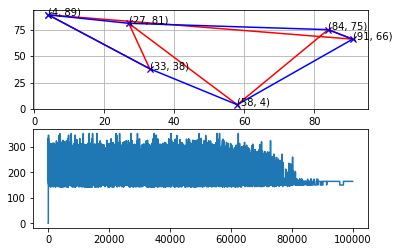

In [13]:
import random 
import numpy as np 
import math 
import copy 
import matplotlib.pyplot as plt

cities = [random.sample(range(100), 2) for x in range(6)]

tour = random.sample(range(6),6)

initDistance = sum([ 
  math.sqrt(sum([
     (cities[tour[(k+1) % 6]][d] - cities[tour[k % 6]][d])**2 
    for d in [0,1] 
   ])
  ) 
  for k in tour
 ])

resulDistance = 0
optimalDistance = 0

print("Cities coordinates: ", cities)
print("Init path for the tour: ", tour)

fig = plt.figure(1)
ax = fig.add_subplot(211)
plt.subplot(211)
plt.plot([cities[tour[i % 6]][0] for i in range(7)], [cities[tour[i % 6]][1] for i in range(7)], 'xr-')

A = [d[0] for d in cities]
B = [d[1] for d in cities]

for xy in zip(A, B):
    ax.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.grid()

g = []
cnt = 0
for temperature in np.logspace(0,5,num=100000)[::-1]:
 g.append(optimalDistance)
 cnt += 1
 [i,j] = sorted(random.sample(range(6),2))
 newTour =  tour[:i] + tour[j:j+1] +  tour[i+1:j] + tour[i:i+1] + tour[j+1:]
 oldDistances =  sum([ 
  math.sqrt(sum([
     (cities[tour[(k+1) % 6]][d] - cities[tour[k % 6]][d])**2 
    for d in [0,1] 
   ])) 
  for k in [j,j-1,i,i-1]
 ])
 newDistances =  sum([ 
  math.sqrt(sum([
     (cities[newTour[(k+1) % 6]][d] - cities[newTour[k % 6]][d])**2 
    for d in [0,1] 
   ])) 
  for k in [j,j-1,i,i-1]
 ])
 if math.exp( ( oldDistances - newDistances) / temperature) > random.random():
  tour = copy.copy(newTour)
  if resulDistance <= newDistances:
   optimalDistance = resulDistance
  resulDistance = newDistances  

plt.plot([cities[tour[i % 6]][0] for i in range(7)], [cities[tour[i % 6]][1] for i in range(7)], 'xb-')


print("Init distance len: ", initDistance)
print("Final resul distance len: ", resulDistance)
print("Final tour path: ", tour)
print("The most optimal distance: ", optimalDistance)

# textstr = '\n'.join((f"Init distance len: {initDistance}", 
#  f"Final resul distance len: {resulDistance}", f"The most optimal distance: {optimalDistance}", ))

# # these are matplotlib.patch.Patch properties
# props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# # place a text box in upper left in axes coords
# ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
#         verticalalignment='top', bbox=props)

plt.subplot(212)
plt.plot(g)

plt.show()